In [ ]:
import pandas as pd
import matplotlib as plt
df = pd.read_csv('TCC (3).csv')
lst = ['Nada','Idade','Autodeclaração','Gênero','Dias trabalhados','Horas trabalhadas','Aplicativos','Vínculo','Escolaridade','Exerce outra atividade','Tempo no ramo','Motivo','Veículo usado','Renda média','Gasto médio','RG1','BairroEntrega','RegiaoCasa','DSCENTRO','DSZL','DSZS','DSZO','DSZN','nada']
i = 0
for c in df.columns:
    df.rename(columns = { str(c) :  lst[i] }, inplace = True)
    i += 1
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Nada                    56 non-null     object
 1   Idade                   56 non-null     object
 2   Autodeclaração          56 non-null     object
 3   Gênero                  56 non-null     object
 4   Dias trabalhados        56 non-null     object
 5   Horas trabalhadas       56 non-null     object
 6   Aplicativos             56 non-null     object
 7   Vínculo                 56 non-null     object
 8   Escolaridade            56 non-null     object
 9   Exerce outra atividade  56 non-null     object
 10  Tempo no ramo           56 non-null     object
 11  Motivo                  56 non-null     object
 12  Veículo usado           56 non-null     object
 13  Renda média             56 non-null     object
 14  Gasto médio             56 non-null     object
 15  RG1     

In [ ]:

j = 0
for i in df['Renda média']:
    if i == 'Abaixo de R$ 1045,00':
        df['Renda média'] = df['Renda média'].replace(i,'Entre R$ 601,00 e 1045,00')
    j+= 1
        
df['Renda média'].value_counts()

Entre R$ 601,00 e 1045,00     34
Entre R$ 1045,00 e 2090,00    12
Abaixo de R$ 600,00            8
Acima de R$ 3135,00            1
Entre R$ 2090,00 e 3135,00     1
Name: Renda média, dtype: int64

In [ ]:
df['BairroEntrega'] = df['BairroEntrega'].str.upper()
df['BairroEntrega'].value_counts()



PINHEIROS                               7
ITAIM BIBI                              6
SÉ                                      5
MOEMA                                   3
ALTO DE PINHEIROS                       2
BUTANTA                                 2
JARDINS                                 2
CAPÃO REDONDO                           2
LAPA                                    2
VILA MARIANA                            2
FREGUESIA                               1
JARDIM PAULISTA                         1
MOCA                                    1
VILA MADALENA                           1
JARDINS OU MOEMA                        1
ITAIM                                   1
SANTA CECÍLIA                           1
VILA MARIANA                            1
LIBERDADE                               1
TATUAPÉ                                 1
TUCURUVI                                1
LIBERDADE                               1
PIRITUBA                                1
PINHEIRO                          

Obtendo o número de entrevistados que trabalham de 5 a 7 dias por semana mais de 8 horas por dia e depois obtendo a 
renda média desses trabalhadores.

Sabemos pela contagem que 66% dos entrevistados estão nessa condição (37 pessoas), 
e que desses 66%, 75% deles ganham menos que um salário mínimo ( 28 pessoas). 



In [ ]:
ab = df.loc[(df['Dias trabalhados'] == '5 a 6 dias') | (df['Dias trabalhados'] == 'Todos os dias') & (df['Horas trabalhadas'] == 'entre 8 e 12 horas')]
ab['Renda média'].value_counts()
for i in ab['Renda média']
    

Entre R$ 601,00 e 1045,00     23
Entre R$ 1045,00 e 2090,00     9
Abaixo de R$ 600,00            5
Name: Renda média, dtype: int64

In [ ]:
cd = df.loc[(df['Tempo no ramo'] == '6 meses ou menos') & (df['Motivo'] == 'Por causa das dificuldades durante a pandemia')]
cd['Dias trabalhados'].value_counts()



5 a 6 dias       12
3  a 4 dias       3
Todos os dias     2
Name: Dias trabalhados, dtype: int64

In [ ]:
ab = pd.crosstab(df['Tempo no ramo'],df['Motivo'])
ab

Motivo,Como complemento de renda,Não consegui outro emprego,Outros,Por causa das dificuldades durante a pandemia
Tempo no ramo,,,,
1 ano,2,6,1,7
6 meses ou menos,1,7,1,17
Entre 1 e 2 anos,3,8,0,0
Entre 2 e 3 anos,1,0,0,0
Mais de 3 anos,1,1,0,0


In [ ]:
ab = pd.crosstab(df['Horas trabalhadas'],df['Renda média'])




#ab.plot.bar(ylabel = 'Frequência',figsize = (10,11))

Abaixo de R$ 600,00  Acima de R$ 3135,00  Entre R$ 1045,00 e 2090,00  Entre R$ 2090,00 e 3135,00  Entre R$ 601,00 e 1045,00
5                    0                    0                           1                           16                           1
3                    0                    8                           0                           18                           1
0                    1                    4                           0                           0                            1
dtype: int64

In [ ]:

j = 0
for i in df['Idade']:
    if i == '3':
        df['Idade'] = df['Idade'].replace(i,'15 - 18 anos')
    j+= 1
        
df['Idade'].value_counts()

18 - 23 anos    19
24 - 30 anos    16
15 - 18 anos    13
31 - 38 anos     8
Name: Idade, dtype: int64

<AxesSubplot:xlabel='Idade', ylabel='Número de pessoas'>

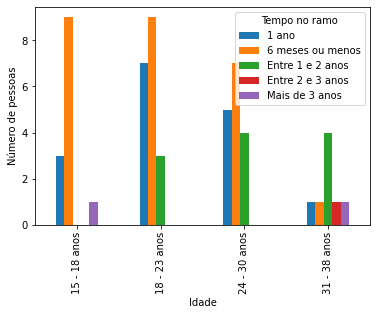

In [ ]:
ab = pd.crosstab(df['Idade'], df['Tempo no ramo'])
ab.plot.bar(ylabel = 'Número de pessoas')

In [ ]:
!conda install geopandas

^C


1 35662.479999999996


<AxesSubplot:xlabel='Idade', ylabel='Número de pessoas'>

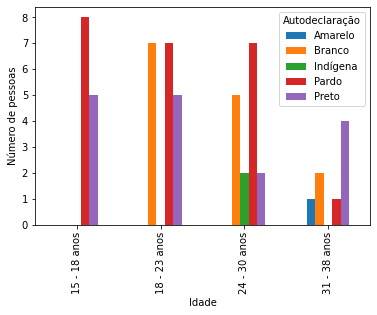

In [ ]:
ab = df.loc[(df['Idade'] == '15 - 18 anos')] 
bg = ab.groupby('Tempo no ramo')
hj = bg['Autodeclaração'].value_counts()



ab = pd.crosstab(df['Idade'], df['Autodeclaração'])
ab.plot.bar(ylabel = 'Número de pessoas')

<AxesSubplot:xlabel='Idade', ylabel='Número de pessoas'>

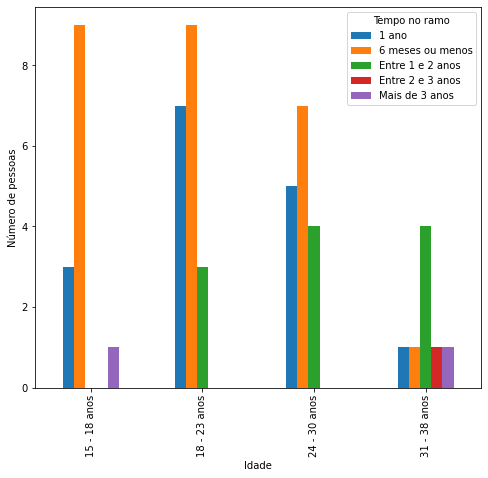

In [ ]:
ab = pd.crosstab(df['Idade'], df['Tempo no ramo'])
ab.plot.bar(ylabel = 'Número de pessoas',figsize = (8,7))

<AxesSubplot:>

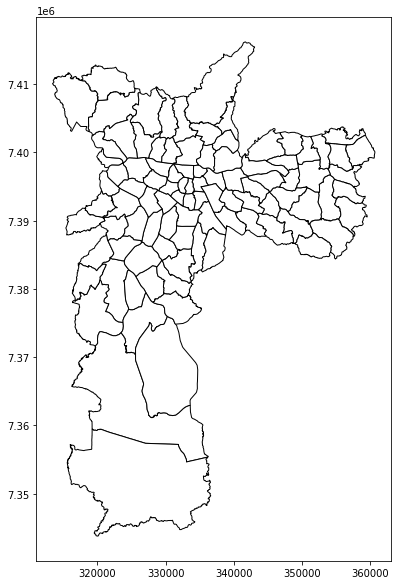

In [ ]:
import geopandas as gpd

sp = gpd.read_file('C:/Users/Pedro/Desktop/DEINFO_DISTRITO.shx')
sp.plot(figsize = (10,10),color = 'white',edgecolor = 'black')


In [ ]:
df['DSCENTRO'].value_counts()

Distrito República    1
Name: DSCENTRO, dtype: int64

In [ ]:
df['DSZN'].value_counts()

Distrito Pirituba          4
Distrito Brasilândia       2
Distrito Vila Medeiros     1
Distrito Freguesia do Ó    1
Distrito Cachoeirinha      1
Distrito Jaçanã            1
Name: DSZN, dtype: int64

In [ ]:
df['DSZS'].value_counts()

Distrito Grajaú             3
Distrito Campo Limpo        3
Distrito Jardim São Luís    2
Distrito Capão Redondo      2
Distrito Jardim  ngela      2
Distrito Parelheiros        1
Distrito Moema              1
Name: DSZS, dtype: int64

In [ ]:
df['DSZL'].value_counts()

Distrito Itaquera             3
Distrito Guaianases           2
Distrito Cidade Tiradentes    1
Distrito Vila Formosa         1
Distrito Sapopemba            1
Distrito Penha                1
Distrito Carrão               1
Name: DSZL, dtype: int64

In [ ]:
df['DSZO'].value_counts()

Distrito Jaguaré        2
Distrito Rio Pequeno    2
Distrito Butantã        2
Distrito Vila Sônia     1
Distrito Pinheiros      1
Name: DSZO, dtype: int64

In [ ]:

brrs = ['República','Pirituba','Brasilândia','Vila Medeiros','Freguesia do Ó','Cachoeirinha','Jaçanã','Grajaú','Campo Limpo','Jardim São Luís','Capão Redondo','Jardim Ângela','Parelheiros','Moema','Itaquera','Guaianases','Cidade Tiradentes','Vila Formosa','Sapopemba','Penha','Carrão','Jaguaré','Rio Pequeno','Butantã','Vila Sônia','Pinheiros']
nms = [1,4,2,1,1,1,1,3,3,2,2,2,1,1,3,2,1,1,1,1,1,2,2,2,1,1]
sp['Numero'] = 0
j = 0
l = 0
for k in brrs:
    for i in sp['Bairro']:
        if k == i:
            sp.loc[[j],['Numero']] = nms[l]
        j += 1
    l += 1
    j = 0

<AxesSubplot:>

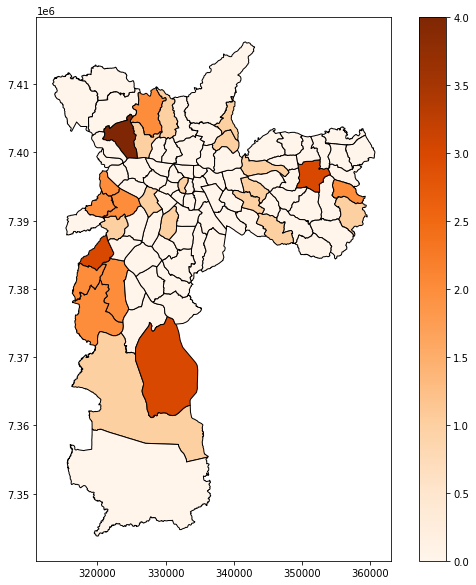

In [ ]:
sp.plot(column = 'Numero', legend = True, figsize = (10,10),cmap = 'Oranges',edgecolor = 'black')

In [ ]:
lista = ['José Bonifácio',
                'Jardim São Luís',
                'Artur Alvim',
                'Jaguará',
                'Vila Prudente',
                'Jaguaré',
                'Jaraguá',
                'Jardim Helena',
                'Jardim Paulista',
                'Lajeado',
                'Lapa',
                'Liberdade',
                'Limão',
                'Vila Medeiros',
                'Jardim Ângela',
                'Parelheiros',
                'Vila Sônia',
                'Água Rasa',
                'Alto de Pinheiros',
                'Anhanguera',
                'Aricanduva',
                'Barra Funda',
                'Bela Vista',
                'Belém', 
                'Bom Retiro', 
                'Brás', 
                'Brasilândia',
                'Butantã',
                'Cachoeirinha', 
                'Cambuci', 
                'Campo Belo', 
                'Campo Grande', 
                'Campo Limpo',
                'Cangaíba',
                'Capão Redondo', 
                'Carrão',
                'Casa Verde', 
                'Cidade Ademar',
                'Cidade Dutra',
                'Cidade Líder',
                'Cidade Tiradentes',
                'Consolação',
                'Cursino', 
                'Ermelino Matarazzo', 
                'Freguesia do Ó',
                'Grajaú', 
                'Guaianases', 
                'Iguatemi',
                'Ipiranga',
                'Itaim Bibi',
                'Itaim Paulista', #50
                'Itaquera', 
                'Jabaquara',
                'Jaçanã',
                'Mandaqui',
                'Marsilac',
                'Moema',
                'Mooca',
                'Morumbi',
                'Pari',
                'Parque do carmo',
                'Penha',
                'Pedreira',
                'Perdizes',
                'Perus',
                'Pinheiros',
                'Pirituba',
                'Ponte Rasa',
                'Raposo Tavares',
                'República',
                'Rio Pequeno', #70
                'Sacomã',
                'Santa Cecília',
                'Santana',
                'Santo Amaro',
                'São Domingos',
                'São Lucas',
                'São Mateus',
                'São Miguel',
                'São Rafael',
                'Sapopemba', # 80
                'Saúde',
                'Sé',
                'Socorro',
                'Tatuapé',  
                'Tremembé',
                'Tucuruvi',
                'Vila Andrade',
                'Vila Curuçá',
                'Vila Formosa',
                'Vila Guilherme', #90
                'Vila Jacuí',
                'Vila Leopoldina',
                'Vila Madalena',
                'Vila Maria',
                'Vila Mariana',
                'Vila Matilde']

_lis = []

    # removendo duplicados
for x in lista:
    if x not in _lis:
        _lis.append(x)
            
print(len(_lis))

97


PINHEIROS                               7
ITAIM BIBI                              6
SÉ                                      5
MOEMA                                   3
BUTANTA                                 2
JARDINS                                 2
VILA MARIANA                            2
ALTO DE PINHEIROS                       2
LAPA                                    2
CAPÃO REDONDO                           2
PIRITUBA                                1
LIBERDADE                               1
JARDIM PAULISTA                         1
JARDINS OU MOEMA                        1
SUMARÉ, BARRA FUNDA ,VILA MADALENA      1
LIBERDADE                               1
VILA MARIANA                            1
VILA OLIMPIA                            1
SANTA CECÍLIA                           1
VILA MADALENA                           1
MÚLTIPLOS, NÃO FICO NA MESMA REGIÃO     1
ITAIM                                   1
HIGIENÓPOLIS                            1
TUCURUVI                          

In [ ]:

brrs = ['Pinheiros','Itaim Bibi','Sé','Moema','Butantã','Jardim Paulista','Vila Mariana','Alto de Pinheiros','Lapa','Capão Redondo','Pirituba','Liberdade','Santa Cecília','Higienópolis','Tucuruvi','Mooca','Tatuapé']
nms = [8,9,5,4,2,4,3,4,2,2,1,2,1,1,1,1,1]
sp['Numero'] = 0
j = 0
l = 0
for k in brrs:
    for i in sp['Bairro']:
        if k == i:
            sp.loc[[j],['Numero']] = nms[l]
        j += 1
    l += 1
    j = 0
